In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
# plt.style.use('seaborn')
%matplotlib inline

# For Logarithm

In [2]:
df = pd.DataFrame()

df['Y=ln(x)'] = np.random.uniform(low = 5, high = 11.3, size = 4000)
df['Er'] = np.random.uniform(low = -0.02, high = 0.02, size = 4000)
df['H=exp(Y)'] = np.exp(df['Y=ln(x)'])
df['Er for H'] = np.power(df['H=exp(Y)'], df['Er']) - 1
df['E'] = np.random.uniform(low = -0.2, high = 0.2, size = 4000)
df['E for H'] = np.exp(df['E']) - 1

df.sort_values(by = 'H=exp(Y)', inplace = True)
df.reset_index(inplace = True)
df.drop('index', axis = 1, inplace = True)

# For power

In [8]:
df2 = pd.DataFrame()
df2['Y=H^0.25'] = np.random.uniform(low = 5, high = 17, size = 4000)
df2['Er'] = np.random.uniform(low = -0.02, high = 0.02, size = 4000)
df2['H=(Y)^4'] = np.power(df2['Y=H^0.25'], 4)
df2['Er for H'] = np.power(1 + df2['Er'], 4) - 1

df2['E'] = np.random.uniform(low = -0.2, high = 0.2, size = 4000)
df2['Er for H 2'] = np.power(1 + df2['E']/df2['H=(Y)^4'] ** 0.25, 4) - 1
df2.sort_values(by = 'H=(Y)^4', inplace = True)
df2.reset_index(inplace = True)
df2.drop('index', axis = 1, inplace = True)

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *  

In [3]:
def color():
    colors = {'color0' :[(0/255, 0/255, 102/255)], 'color1' :[(0/255, 76/255, 255/255)],\
                  'color2' :[(0/255, 102/255, 204/255)], 'color3' :[(51/255, 153/255, 204/255)],\
                      'color4' :[(153/255, 204/255, 255/255)], 'color5' :[(204/255, 153/255, 255/255)],\
                          'color6' :[(255/255, 102/255, 178/255)], 'color7' :[(255/255, 51/255, 153/255)],\
                              'color8' :[(204/255, 0/255, 102/255)], 'color9' :[(153/255, 0/255, 76/255)]}

    df_colors = pd.DataFrame (colors).transpose()
    

    return pd.DataFrame(np.repeat(df_colors.values, 400, axis=0), columns=['RGB'])

In [6]:
def visualization(x, y, df, x_lim, y_lim, x_label, y_label, output):
    
    plt.figure(figsize = (6,4))
    plt.rc('xtick', labelsize=14) 
    plt.rc('ytick', labelsize=14)
    plt.rc('font', **{'family' : 'Arial','weight' : 'normal'})
    
    plt.xlim(x_lim)
    plt.ylim(y_lim)
#     plt.xticks([0,20000,40000,60000,80000])

    
    plt.xlabel(x_label, fontname="Arial", fontsize=16)
    plt.ylabel(y_label, fontname="Arial", fontsize=16)
    
    plt.scatter(df[x],df[y], facecolors='none', color = df['color'], s = 12)
    
    
    plt.grid()

    plt.tight_layout()
    plt.savefig(output+'.png', dpi = 300)

# log vis

In [5]:
df['color'] = color()['RGB']

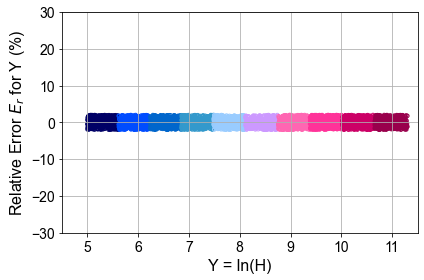

In [7]:
visualization(x = 'Y=ln(x)', y = 'Er', df = df, x_lim = [4.5, 11.5], y_lim = [-30, 30],\
              x_label = 'Y = ln(H)', y_label = r'Relative Error $E_{r}$ for Y (%)', output = 'Er vs. Y=ln(x)')

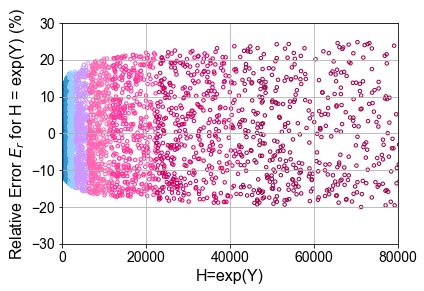

In [22]:
visualization(x = 'H=exp(Y)', y = 'Er for H', df = df, x_lim = [0, 80000], y_lim = [-30, 30],\
              x_label = 'H=exp(Y)', y_label = r'Relative Error $E_{r}$ for H = exp(Y) (%)',\
              output = 'Er for H vs. Y=ln(x)')

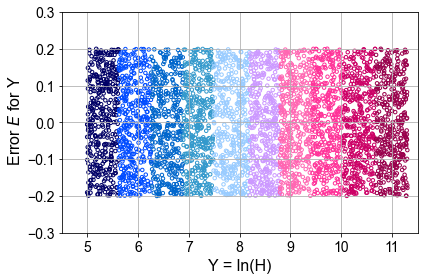

In [7]:
visualization(x = 'Y=ln(x)', y = 'E', df = df, x_lim = [4.5, 11.5], y_lim = [-.3, .3],\
              x_label = 'Y = ln(H)', y_label = r' Error $E$ for Y', output = 'E vs. Y=ln(x)')

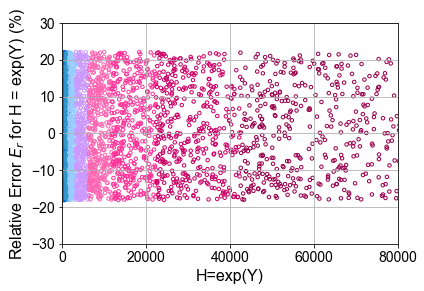

In [23]:
visualization(x = 'H=exp(Y)', y = 'E for H', df = df, x_lim = [0, 80000], y_lim = [-30, 30],\
              x_label = 'H=exp(Y)', y_label = r'Relative Error $E_{r}$ for H = exp(Y) (%)',\
              output = 'E for H vs. Y=ln(x)')

# power vis

In [9]:
df2.head()

,Y=H^0.25,Er,H=(Y)^4,Er for H,E,Er for H 2
0,5.003093,0.016594,626.547703,0.068045,-0.189583,-0.143173
1,5.008785,0.019521,629.403879,0.080402,0.100002,0.082285
2,5.011135,-0.013743,630.585957,-0.053849,0.016473,0.013214
3,5.016579,0.013526,633.330868,0.055212,-0.055704,-0.043681
4,5.020250,-0.012273,635.186787,-0.048194,-0.189558,-0.142693


In [10]:
df2['color'] = color()['RGB']

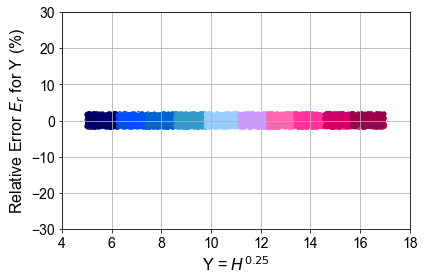

In [13]:
visualization(x = 'Y=H^0.25', y = 'Er', df = df2, x_lim = [4, 18], y_lim = [-30, 30],\
              x_label = r'Y = ${H}^{0.25}$', y_label = r'Relative Error $E_{r}$ for Y (%)', output = 'Er vs. Y=H^0.25')

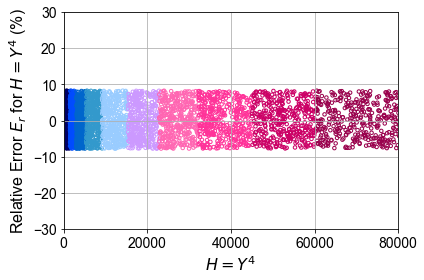

In [14]:
visualization(x = 'H=(Y)^4', y = 'Er for H', df = df2, x_lim = [0, 80000], y_lim = [-30, 30],\
              x_label = r'$H = {Y}^{4}$', y_label = r'Relative Error $E_{r}$ for $H = Y^{4}$ (%)',\
              output = 'Er for H vs. H=(Y)^4')

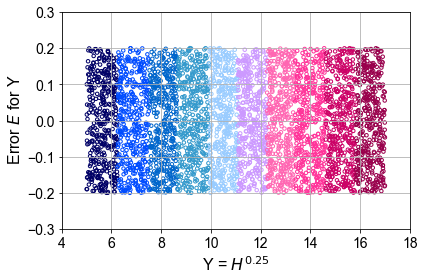

In [11]:
visualization(x = 'Y=H^0.25', y = 'E', df = df2, x_lim = [4, 18], y_lim = [-.3, .3],\
              x_label = r'Y = ${H}^{0.25}$', y_label = r' Error $E$ for Y', output = 'E vs. Y=H^0.25')

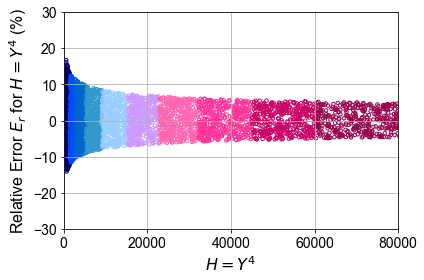

In [16]:
visualization(x = 'H=(Y)^4', y = 'Er for H 2', df = df2, x_lim = [0, 80000], y_lim = [-30, 30],\
              x_label = r'$H = {Y}^{4}$', y_label = r'Relative Error $E_{r}$ for $H = Y^{4}$ (%)',\
              output = 'Er for H 2 vs. H=(Y)^4')